In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib as plt

In [4]:
import matplotlib.pyplot as plt


In [5]:
import seaborn as sns

In [6]:
from scipy.stats import mode

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
from sklearn.svm import SVC

In [10]:
from sklearn.naive_bayes import GaussianNB

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
from scipy.stats import mode

In [14]:
%matplotlib inline

In [15]:
#Reading the dataset

In [16]:
# Reading the train.csv by removing the 
# last column since it's an empty column

In [17]:
DATA_PATH = "dataset/Training.csv"
data = pd.read_csv("Training.csv").dropna(axis = 1)

In [18]:
# Checking whether the dataset is balanced or not

In [19]:
train=pd.read_csv("Training.csv")
test=pd.read_csv("Testing.csv")

In [20]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [21]:
train.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [23]:
train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [24]:
train.shape

(4920, 134)

In [25]:
train=train.drop(["Unnamed: 133"],axis=1)

In [26]:
train.prognosis.value_counts()

prognosis
Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
All

In [27]:
col=train.columns
col

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

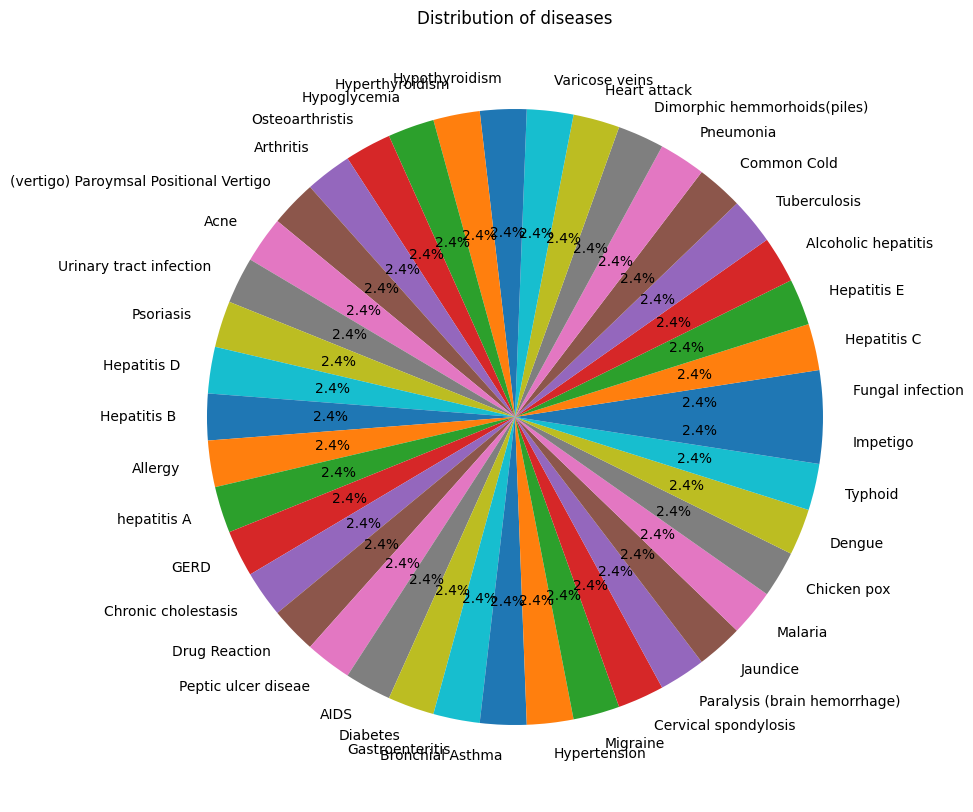

In [28]:
diseases = ["Fungal infection", "Hepatitis C", "Hepatitis E", "Alcoholic hepatitis", "Tuberculosis", "Common Cold", "Pneumonia", "Dimorphic hemmorhoids(piles)", "Heart attack", "Varicose veins", "Hypothyroidism", "Hyperthyroidism", "Hypoglycemia", "Osteoarthristis", "Arthritis", "(vertigo) Paroymsal Positional Vertigo", "Acne", "Urinary tract infection", "Psoriasis", "Hepatitis D", "Hepatitis B", "Allergy", "hepatitis A", "GERD", "Chronic cholestasis", "Drug Reaction", "Peptic ulcer diseae", "AIDS", "Diabetes", "Gastroenteritis", "Bronchial Asthma", "Hypertension", "Migraine", "Cervical spondylosis", "Paralysis (brain hemorrhage)", "Jaundice", "Malaria", "Chicken pox", "Dengue", "Typhoid", "Impetigo"]

cases = [120] * len(diseases)

plt.figure(figsize=(10, 10))
plt.pie(cases, labels=diseases, autopct='%1.1f%%')
plt.title("Distribution of diseases")
plt.show()

c:\Users\Venkat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


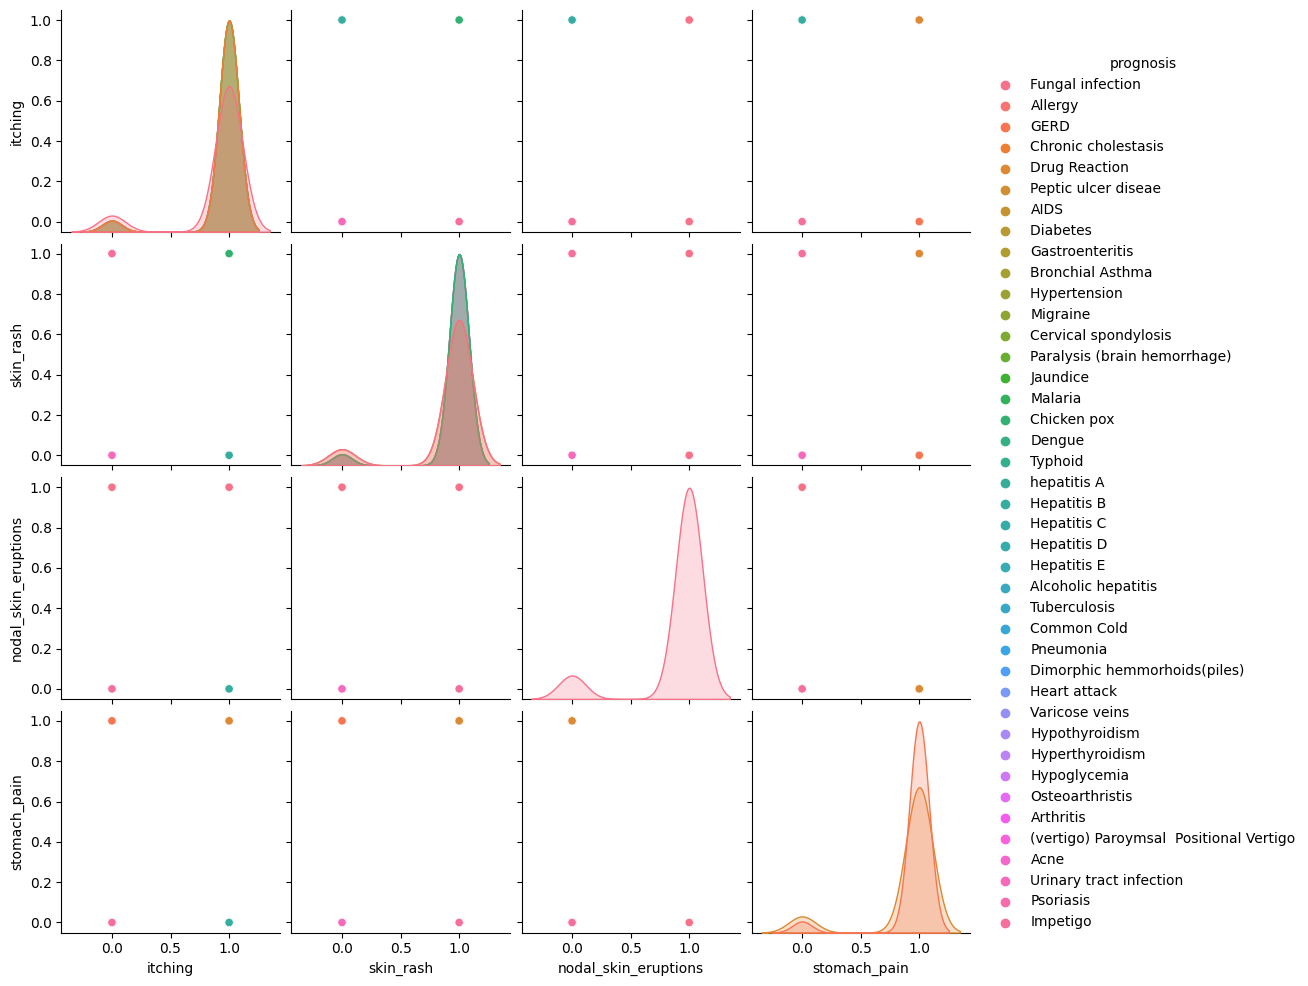

In [29]:
selected_columns = ['itching', 'skin_rash', 'nodal_skin_eruptions', 'stomach_pain', 'prognosis']

train_selected = train[selected_columns]

sns.pairplot(train_selected, hue='prognosis')

plt.show()

In [30]:
#Reading the dataset

In [31]:
#removing the last column since it's an empty column

In [32]:
DATA_PATH = "Training.csv"
data = pd.read_csv("Training.csv").dropna(axis = 1)

In [33]:
# Checking whether the dataset is balanced or not

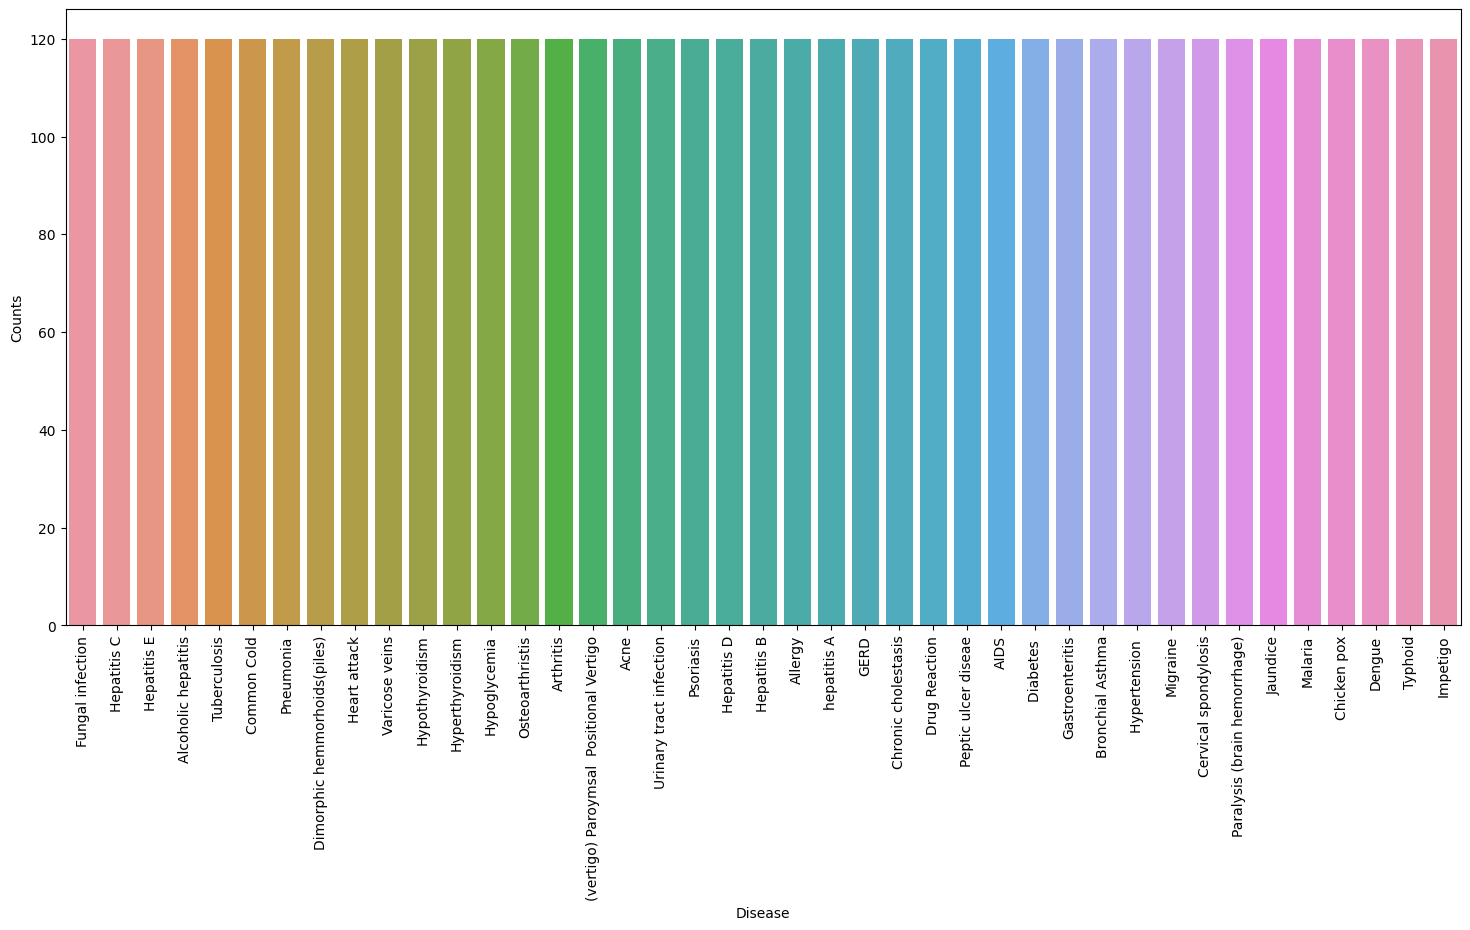

In [34]:
disease_counts = data["prognosis"].value_counts()
temp_df = pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})
 
plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()

In [35]:
#Encoding the target value into numerical value using LabelEncoder

In [36]:
encoder = LabelEncoder()
data["prognosis"] = encoder.fit_transform(data["prognosis"])

In [37]:
#Splitting the data for training and testing the model

In [38]:

X = data.iloc[:,:-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test =train_test_split(
  X, y, test_size = 0.2, random_state = 24)
 
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [39]:
#Model Building
#Using K-Fold Cross-Validation for model selection 

In [40]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))
 

In [41]:
# Initializing Models
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
}

In [42]:
#cross validation score for the models
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv = 10, 
                             n_jobs = -1, 
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [43]:
#combining all models

In [44]:
# Training and testing SVM Classifier

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


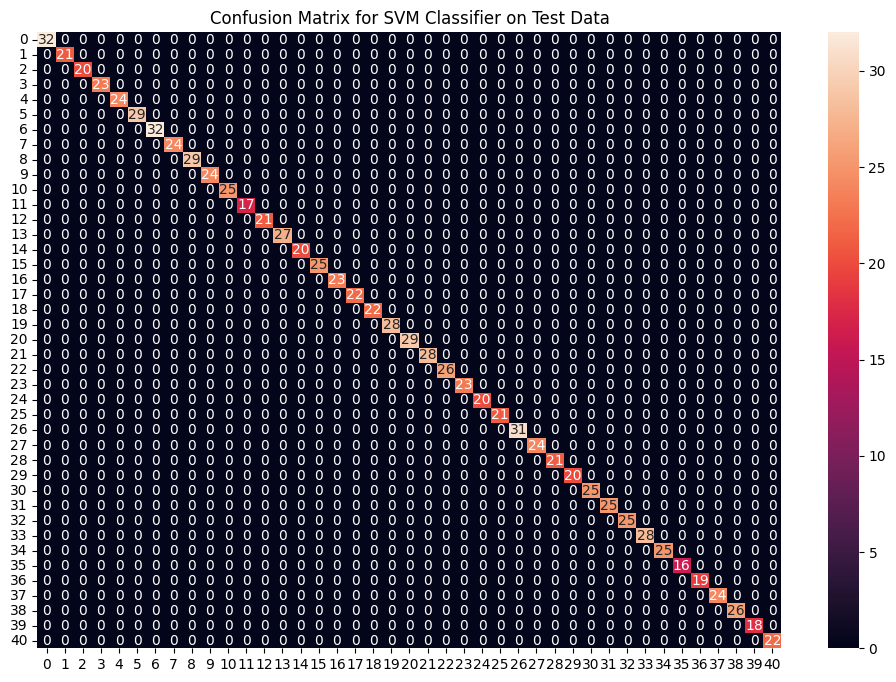

In [45]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)
 
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [46]:
# Training and testing Naive Bayes Classifier

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


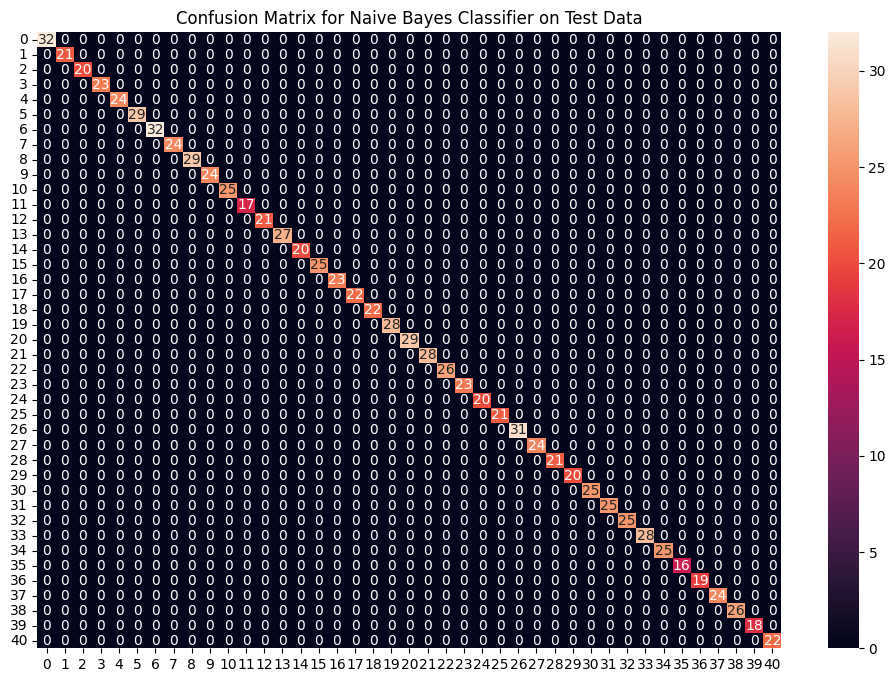

In [47]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [48]:
# Training and testing Random Forest Classifier

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


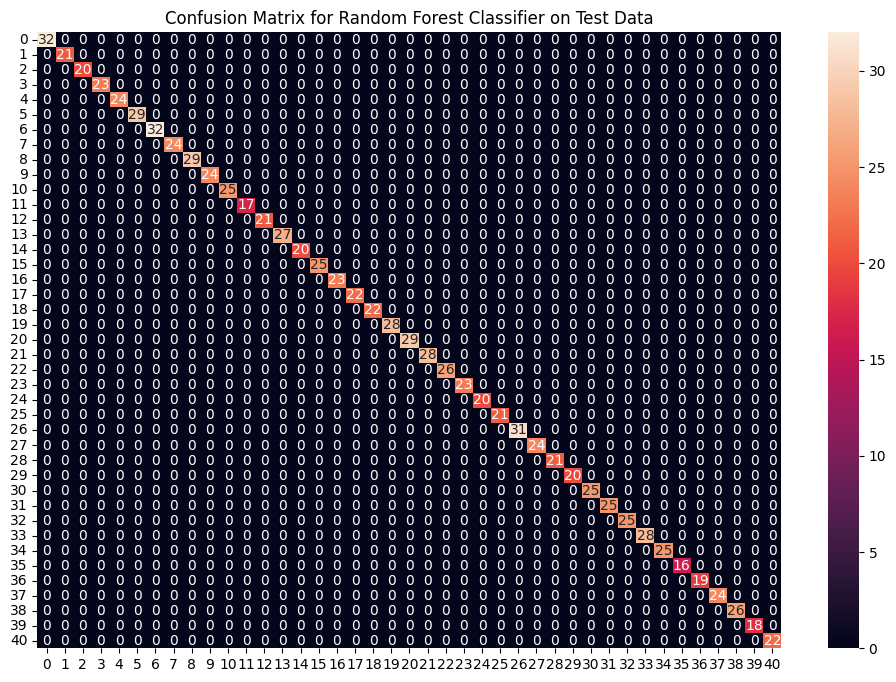

In [49]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [50]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [51]:
# Reading the test data
test_data = pd.read_csv("Testing.csv").dropna(axis=1)
 
test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

Accuracy on Test dataset by the combined model: 100.0


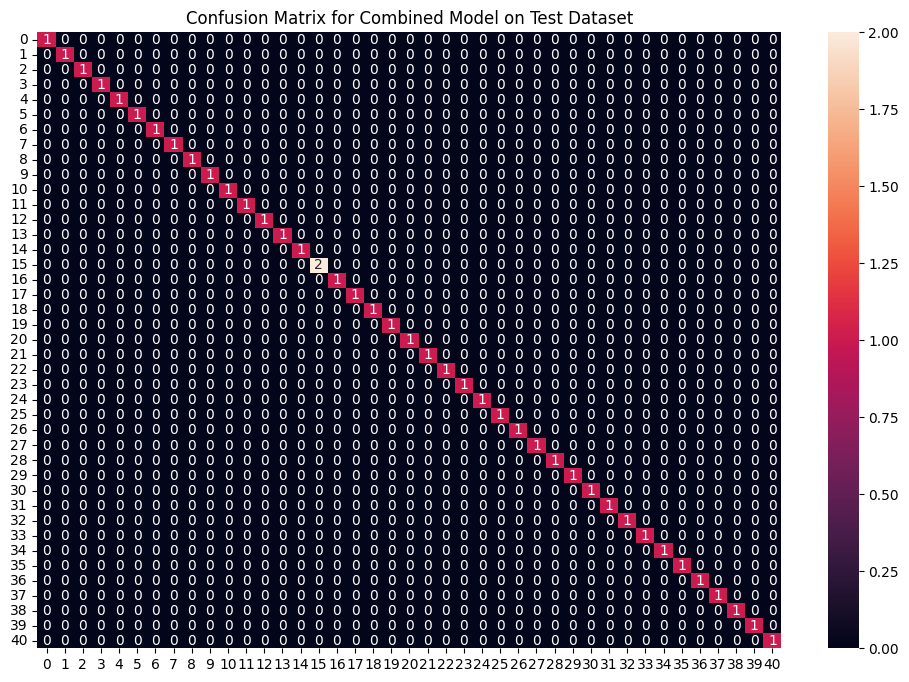

In [52]:
# Making predictions by taking the mode of predictions made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Use the scipy mode function
final_preds = [max(set([i, j, k]), key=[i, j, k].count) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100}")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [53]:
symptoms = X.columns.values
 
# Creating a symptom index dictionary to encode the
# input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index
 
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [2]:
symptoms = X.columns.values

# Creating a symptom index dictionary to encode the input symptoms into numerical form
symptom_index = {}
for index, value in enumerate(symptoms):
	symptom = " ".join([i.capitalize() for i in value.split("_")])
	symptom_index[symptom] = index

data_dict = {
	"symptom_index":symptom_index,
	"predictions_classes":encoder.classes_
}

# Defining the Function
# Input: string containing symptoms separated by commas
# Output: Generated predictions by models
def predictDisease(symptoms):
	symptoms = symptoms.split(",")
	
	# creating input data for the models
	input_data = [0] * len(data_dict["symptom_index"])
	for symptom in symptoms:
		index = data_dict["symptom_index"][symptom]
		input_data[index] = 1
		
	# reshaping the input data and converting it
	# into suitable format for model predictions
	input_data = np.array(input_data).reshape(1,-1)
	
	# generating individual outputs
	rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
	nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
	svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
	
	# making final prediction by taking mode of all predictions
	final_prediction = max([rf_prediction, nb_prediction, svm_prediction])[0][0]
	predictions = {
		"rf_model_prediction": rf_prediction,
		"naive_bayes_prediction": nb_prediction,
		"svm_model_prediction": svm_prediction,
		"final_prediction":final_prediction
	}
	return predictions

# Testing the function
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


NameError: name 'X' is not defined